<a href="https://colab.research.google.com/github/salwaadalla/used-refurbished-device-pricing/blob/main/RECELL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
import os
file_path = os.path.expanduser("~/Desktop/used_device_data.csv")
data=pd.read_csv(file_path)

## Data Overview

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


* The dataset contains information about different devices.

* A high percetage of devices seem to be running on Android and has 4G.

* There are devices that have bee used for almost a year available for sale.


In [ ]:
data.shape

(3454, 15)

* The dataset contains information (15 attributes) about 3454 devices.

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- There are 33 brands in the data and a category *Others* too.
- Android is the most common OS for the used devices.
- The weight ranges from 69g to 855g.
    - This does not seem incorrect as the data contains feature phones and tablets too.
- There are a few unusually low values for the internal memory and RAM of used devices, but those are likely due to the presence of feature phones in the data.
- The average value of the normalized price of a used device is approx. 4.4 euros.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float and int type*) and 4 string (*object* type) columns in the data
* The target variable is the normalized used price, which is of *float* type

In [ ]:
data.duplicated().sum()

0

* There is no duplicate values in
the data.

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in 6 columns

In [ ]:
df=data.copy()

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 8), kde=False, bins=None):
    fig, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,)
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, color="Red", showmeans=True)
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    )  if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--")
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")


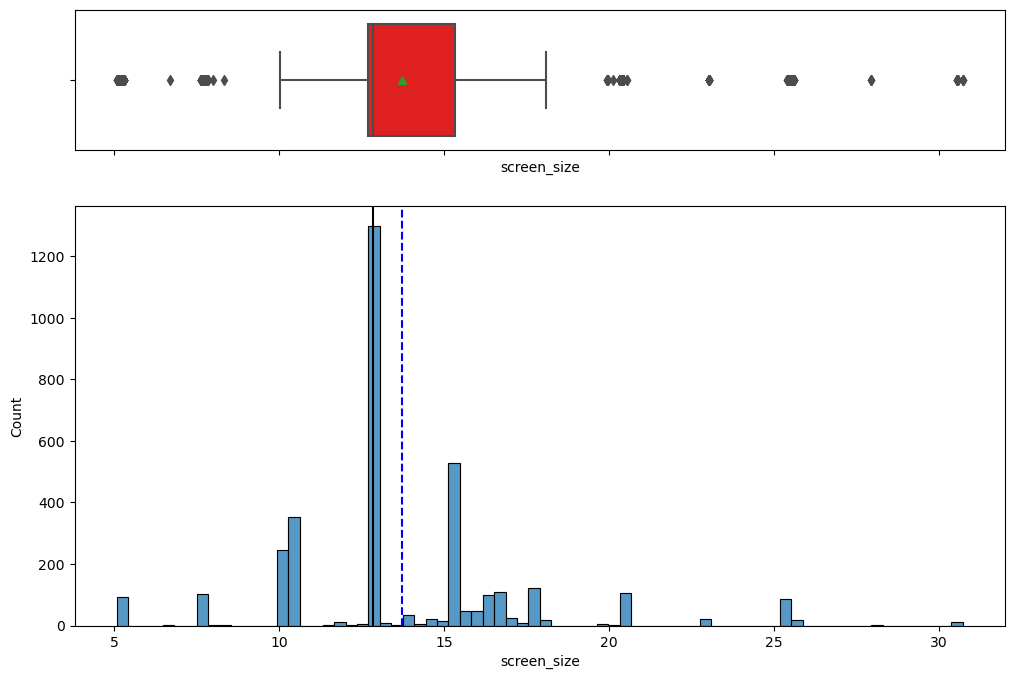

In [ ]:
histogram_boxplot (df, 'screen_size')

In [ ]:
df['screen_size'].median()

12.83

* The median for screen size is around 13 cm.
* Around 50% of the devices has a screen larger than 13 cm.
* Some devices have a screen size of 20 cm and more as outliers.
* Some devices have a screen size less than 10 cm as outliers.

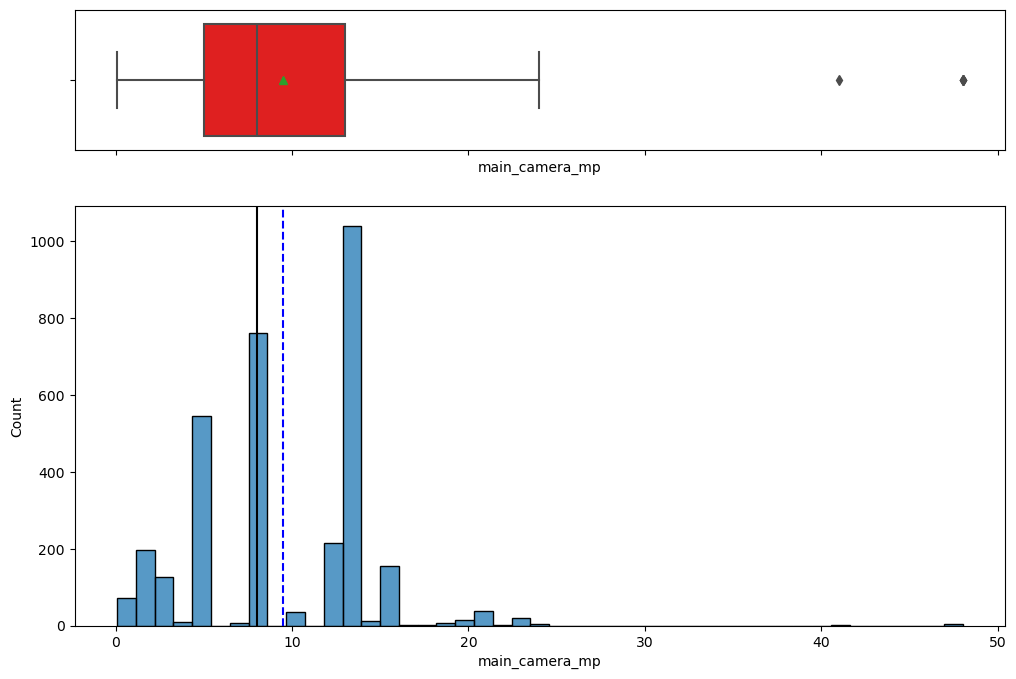

In [ ]:
histogram_boxplot (df,'main_camera_mp')

* The mean for sresolution of the rear camera is around 9 mp.
* Most of the devices have the resolution of the rear camera about 13 mp.
* Few devices offer rear cameras with more than 20MP resolution.

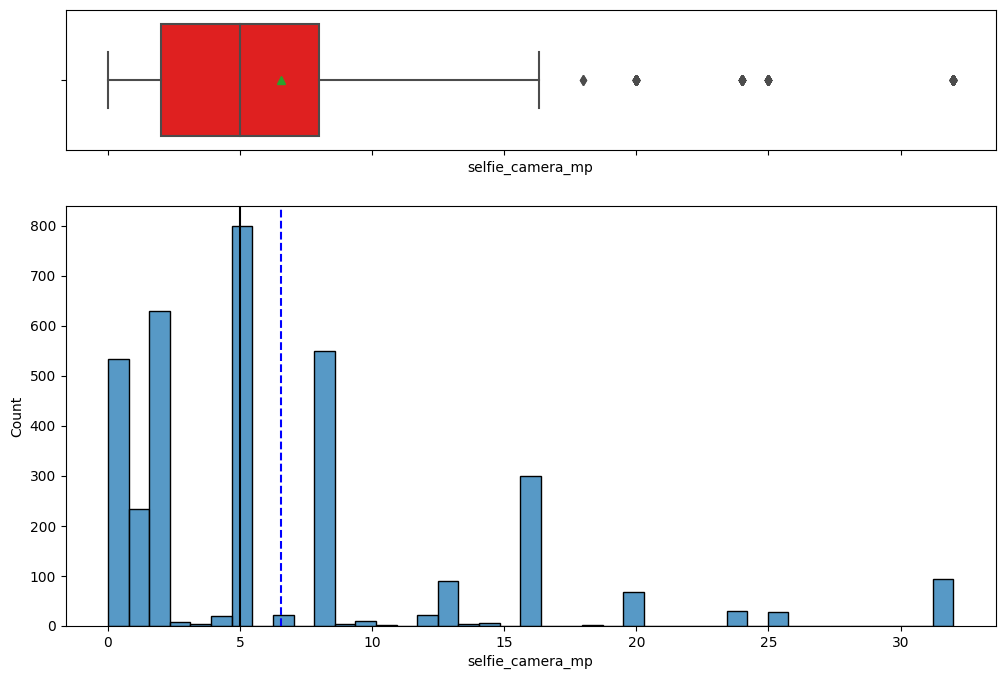

In [ ]:
histogram_boxplot (df,'selfie_camera_mp')

* The mean for sresolution of the rear camera is around 6 mp.
* Most of the devices have the resolution of the rear camera about 5 mp.
* Some devices do not provide a front camera (most likely the feature phones), while few devices offer ones with more than 16MP resolution.

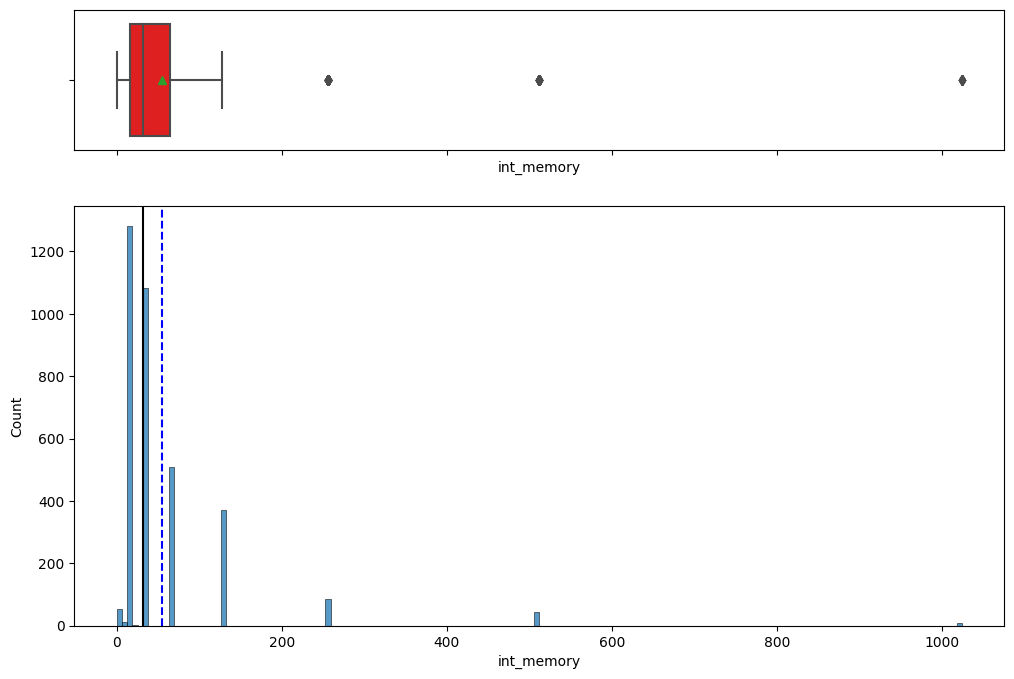

In [ ]:
histogram_boxplot (df,'int_memory')

* The distribution for the Resolution of the front camera is heavily right-skewed.
* The mean for sresolution for amount of internal memory (ROM) is around 55 GB.
* 50% percent of the devices is between 16 and 32 GB.
* Few devices offer more than 256GB internal memory.

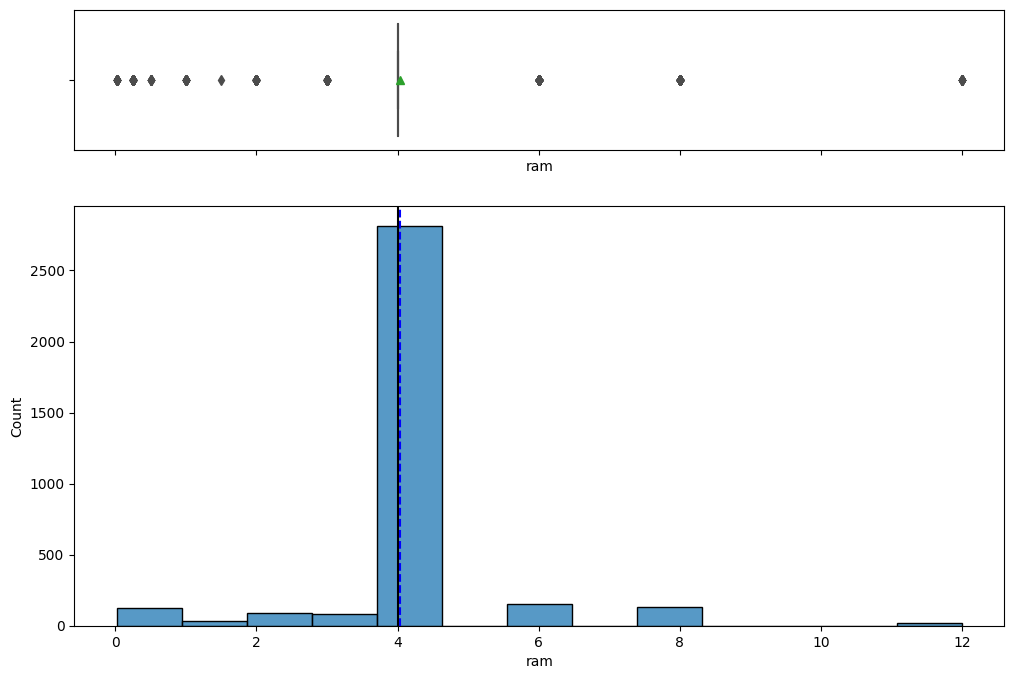

In [ ]:
histogram_boxplot (df,'ram')

* The medain and the mean are equal for amount of RAM for the devices whih is 4GB.
* Most of the devices have 4GB of Ram very few offer greater than 8GB RAM.

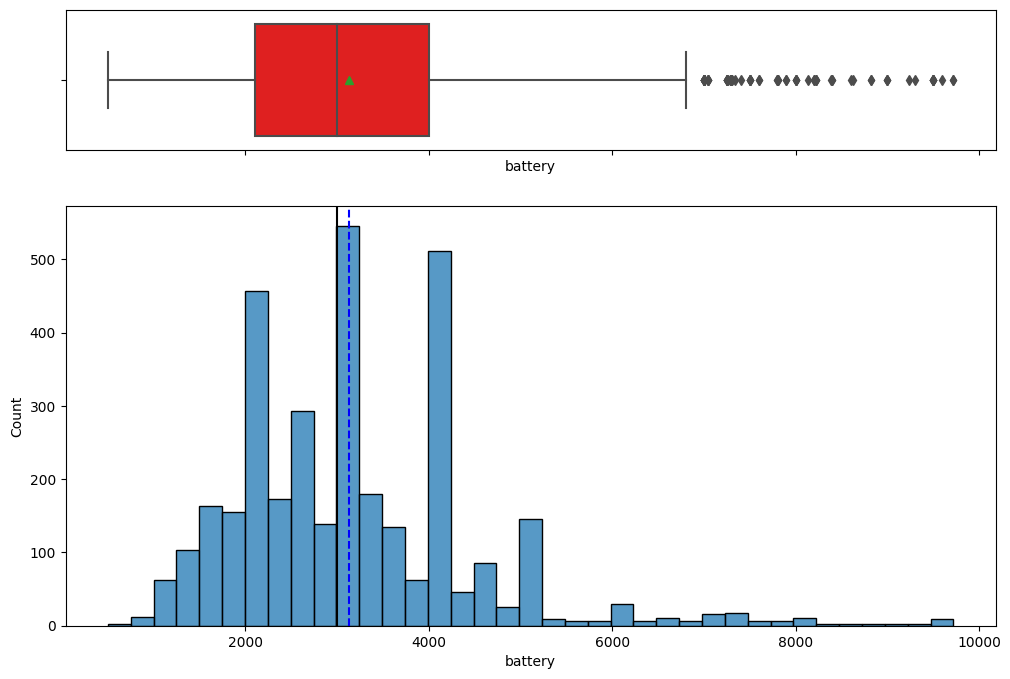

In [ ]:
histogram_boxplot (df,'battery')

* TThe distribution of energy capacity of battery is close to normally distributed with a few upper outliers.
* 50% of the devices battery capacity is between 2000 - 4000 mAh.

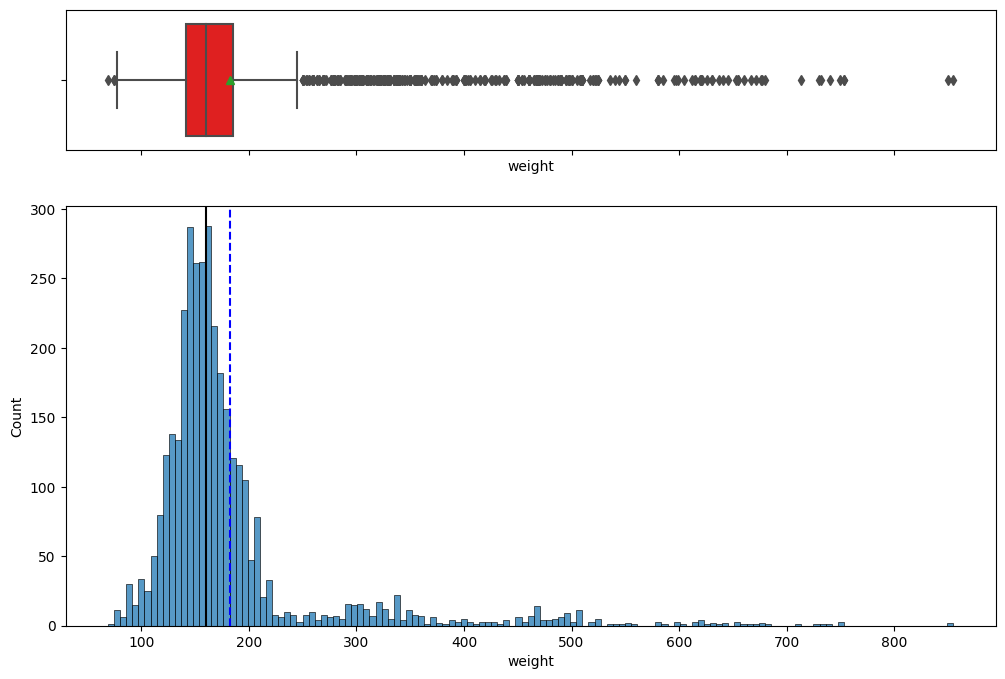

In [ ]:
histogram_boxplot (df,'weight')

* The distribution for weight of the device in grams is heavily right-skewed.

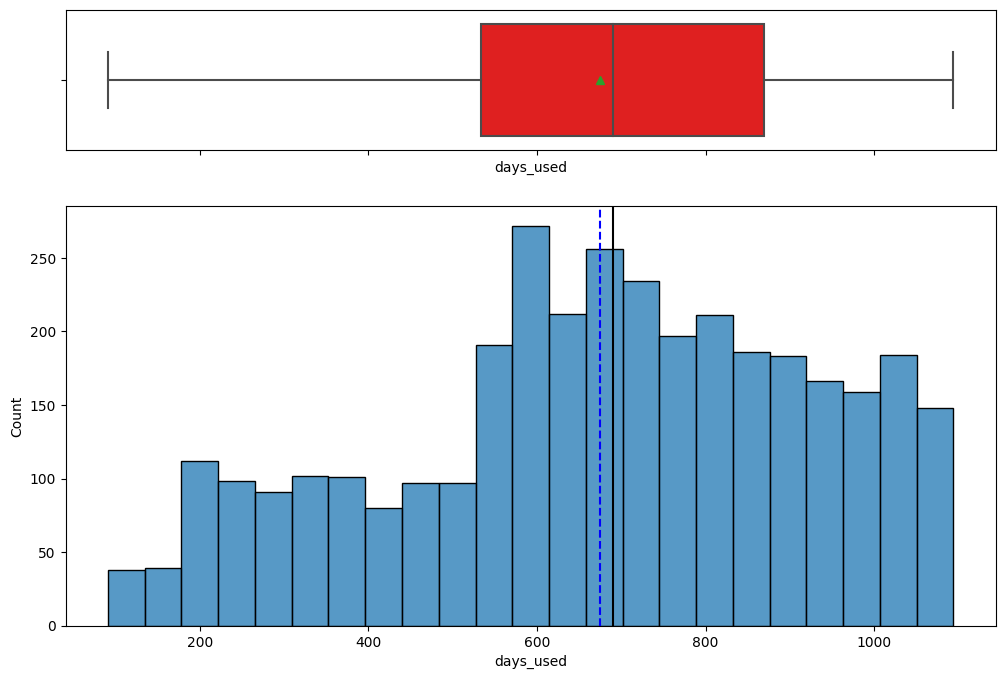

In [ ]:
histogram_boxplot (df,'days_used')

* The distribution of the number of days the device was used is sligtly left-skewed with no outliers.
* Around 50% of the devices in the data have been used for more than 700 days.

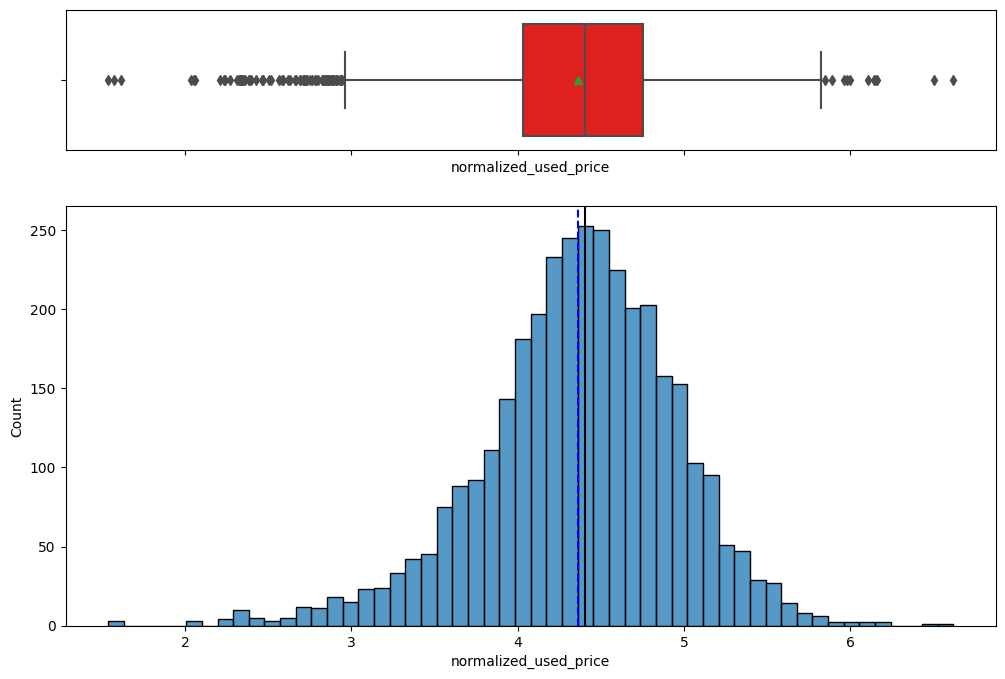

In [ ]:
histogram_boxplot (df,'normalized_used_price')

* The normalized price of a used device of the same model is normally distributed with slight skewed to the left.
* The mean normalized price of a new device is 4.3 EUR.


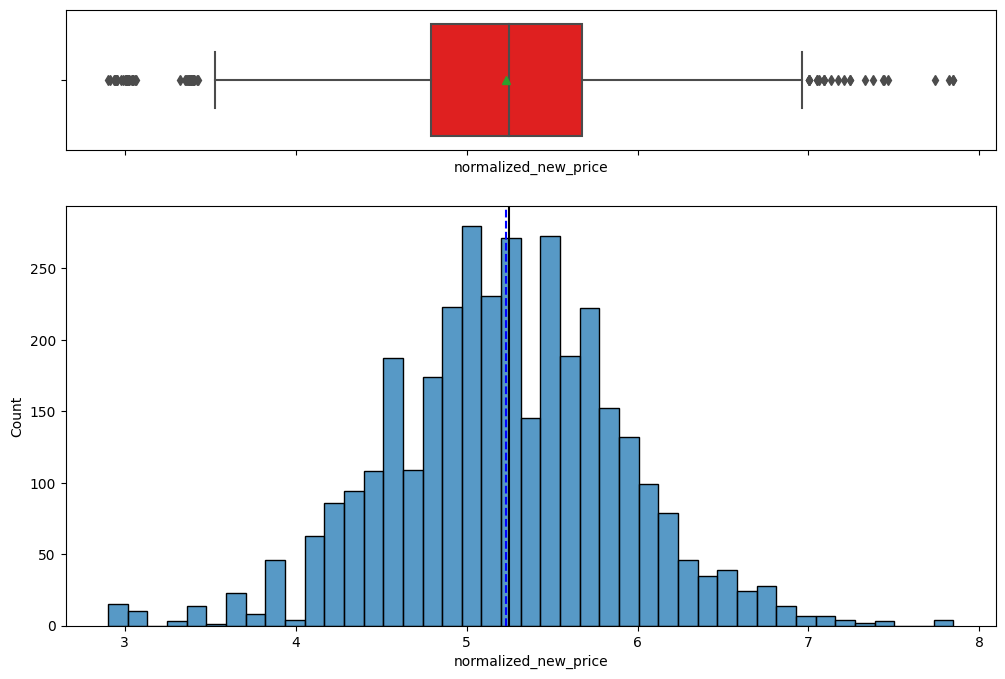

In [ ]:
histogram_boxplot (df,'normalized_new_price')

* The normalized price of a new device of the same model is normally distributed.
* The mean normalized price of a new device is 5.2 EUR.

In [ ]:
def barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

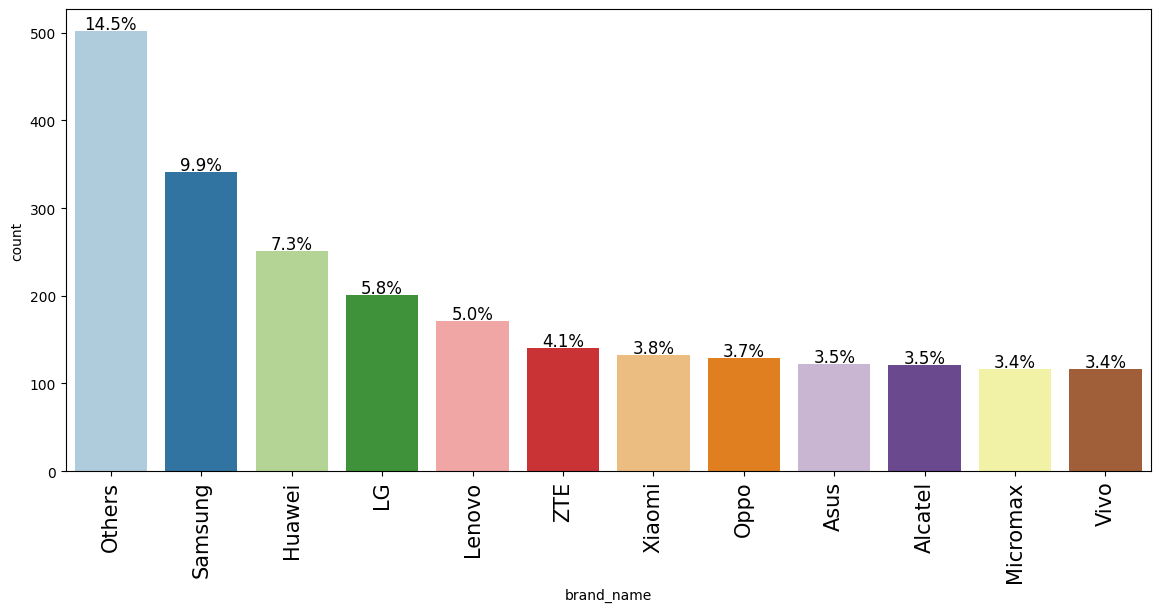

In [ ]:
barplot(df,'brand_name', perc=True, n =12)

* The major brands for the devices are: Sumsung (9.9%), Huawei (7.3%) and LG (5.8%).
* 14.5% of the devices in the data are from brands other than the listed ones.

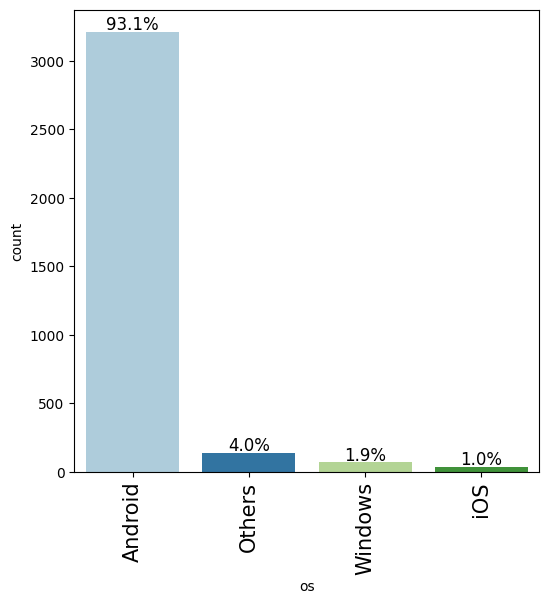

In [ ]:
barplot(df,'os', perc=True, n=4)

* Android devices dominate ~93% of the used device market.


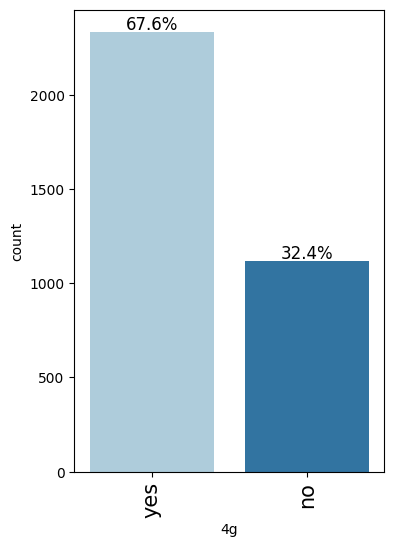

In [ ]:
barplot(df,'4g', perc=True)

* Nearly two-thirds of the devices in this data have 4G available.

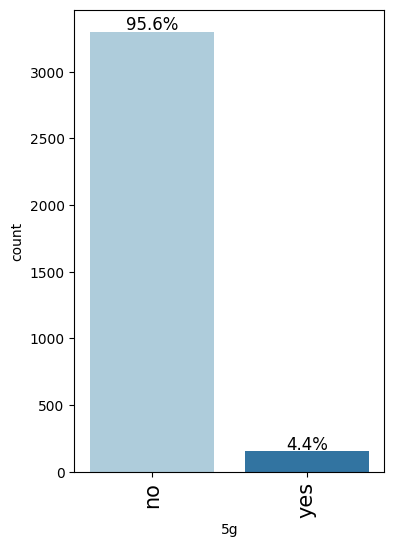

In [ ]:
barplot(df,'5g', perc=True)

* 95.6% of the devices does not have 5G Network.

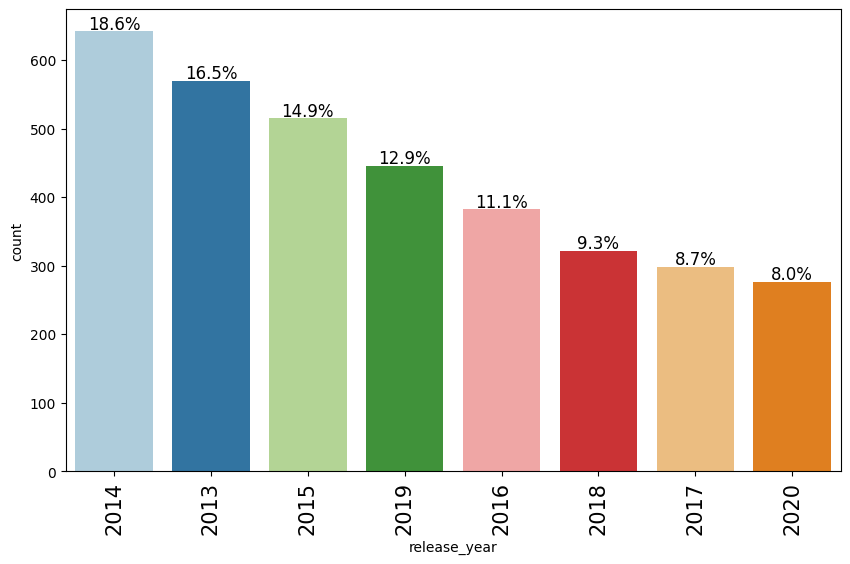

In [ ]:
barplot(df,'release_year', perc=True)

*  50% of the devices models were released before 2015.
* 8% of the devices models were released in 2020.

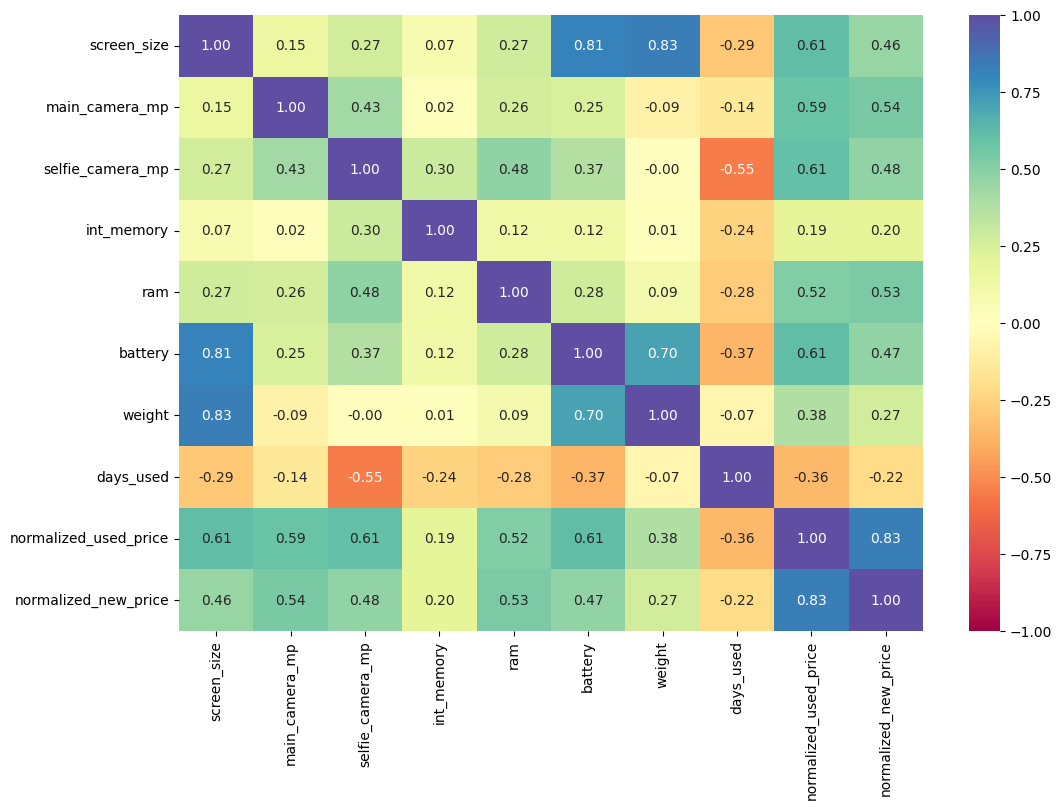

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove("release_year")

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Weight, screen size, and battery capacity of a device show a good amount of correlation.
    - This makes sense as larger battery capacity requires bigger space, thereby increasing screen size and weight.
* The normalized used device price is highly correlated with the normalized price of a new device model.
    * This makes sense as the price of a new model is likely to affect the used device price.
* The normalized used device price is also moderately correlated with the resolution of the cameras provided, the size of the screen, and the battery capacity.
* The number of days a device is used is negatively correlated with the resolution of its front camera.
    * This makes sense as older devices did not offer as powerful front cameras as the recent ones.


    
---------------------------------------
RAM is one of the factors that customers choose their devices based on. Let's see the variation of RAM based on the brands.

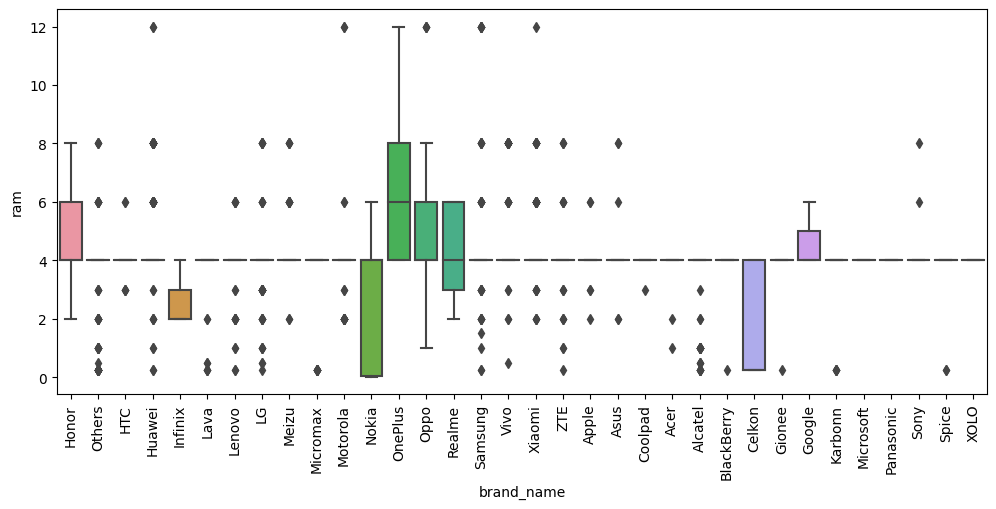

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* Devices offered by most of the companies have 4GB of RAM.
* 50% of OnePlus devices have 6GB or more RAM, indicating that OnePlus devices offer more RAM in general.

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

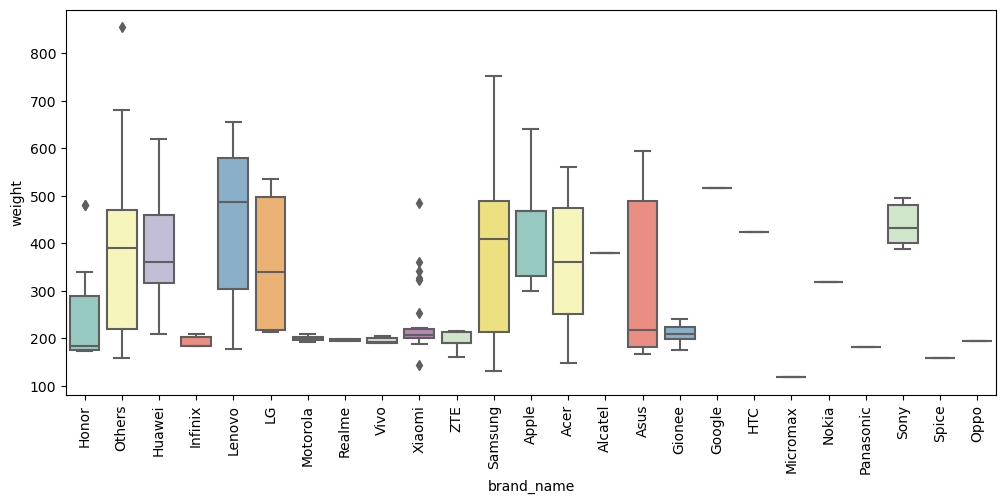

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight", palette="Set3")
plt.xticks(rotation=90)
plt.show()

* A lot of brands offer devices which are not very heavy but have a large battery capacity.
* Some devices offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
* Some devices offered by brands like Huawei, Apple, Sony, etc. offer great batteries but are heavier.
---------------------------------------
Nowadays people prefer bigger screen devices especially work from home people and gamers, so let's explore the devices for bigger screen.

In [ ]:
large_screen = df[df.screen_size > 6 * 2.54] # phone with a 6.7-inch screen (and above) would be considered a large phone, data in cm so * 2.54 to covert to cm.
large_screen.shape

(1099, 15)

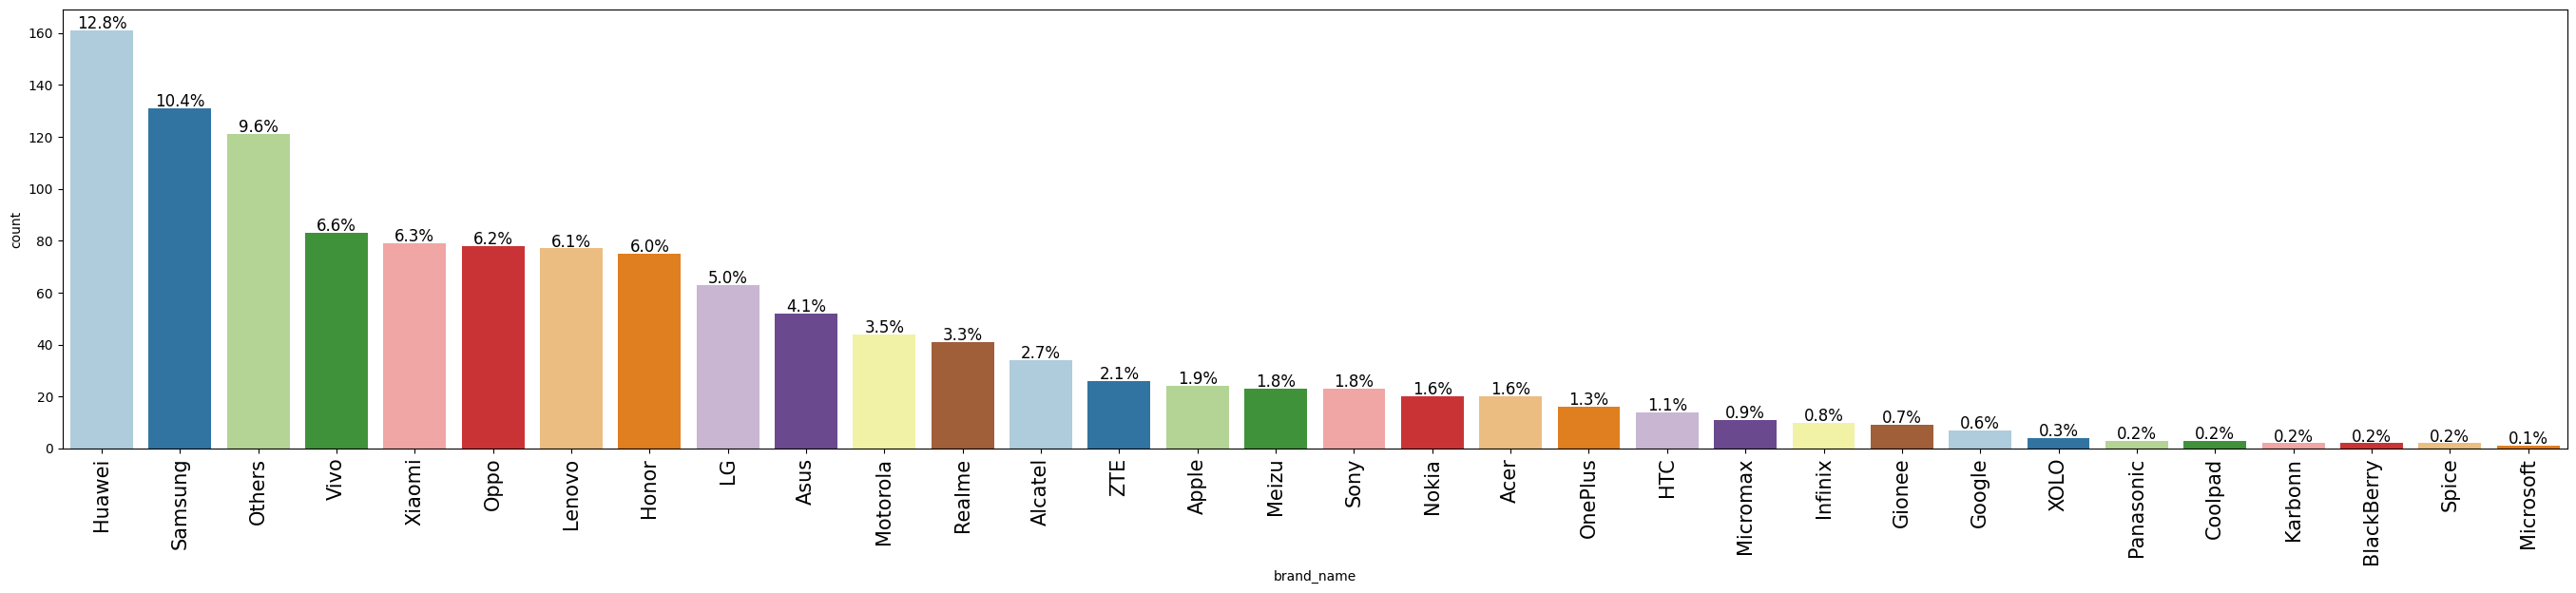

In [ ]:
barplot(large_screen,'brand_name',perc=True)

* Huawei and Samsung offer a lot of devices suitable for customers buying phones and tablets for entertainment purposes.
_____________________________________
People prefer cameras with high resoultions for front and back camera.

In [ ]:
front_camera = df[df.selfie_camera_mp > 8]
back_camera = df[df.main_camera_mp > 16] # Rear cameras generally have a better resolution than front cameras.

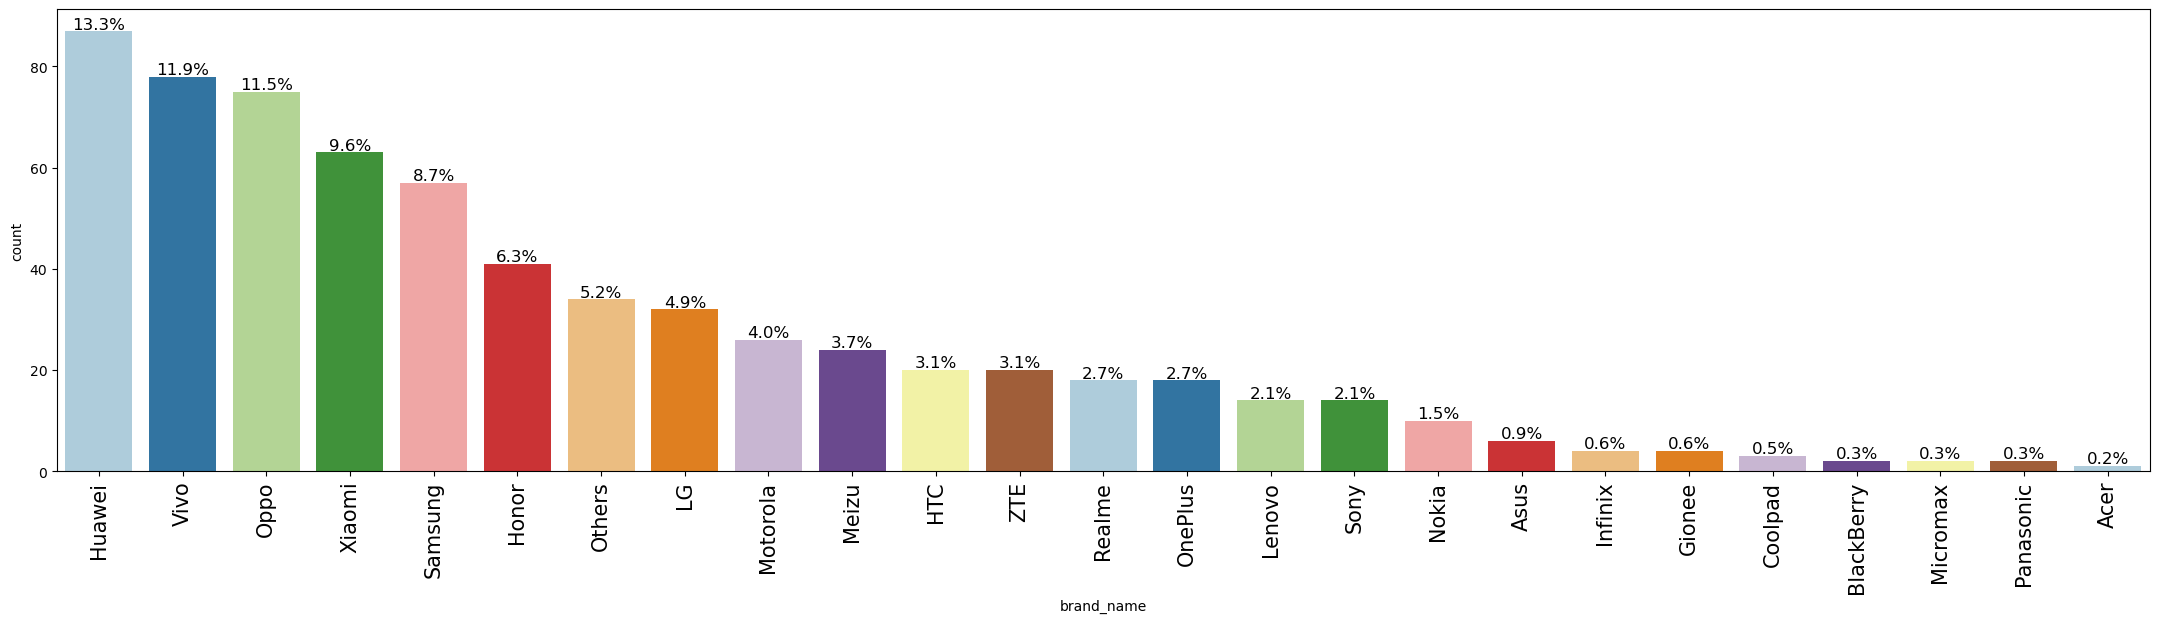

In [ ]:
barplot(front_camera,'brand_name',perc=True)

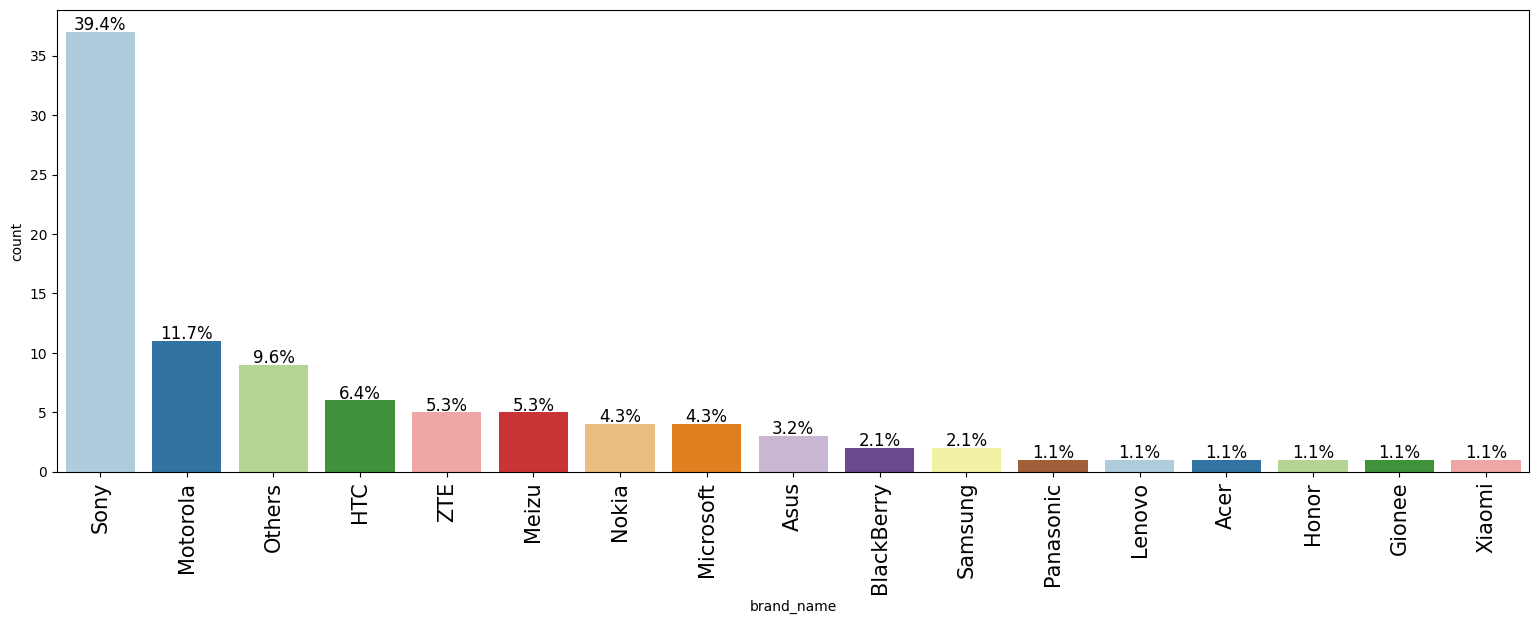

In [ ]:
barplot(back_camera,'brand_name',perc=True)

* Huawei, Vivo and Oppo has the highest number of devices with a high resolution for front camera.
* Sony has the highest number of devices with a high resolution for the back camera.

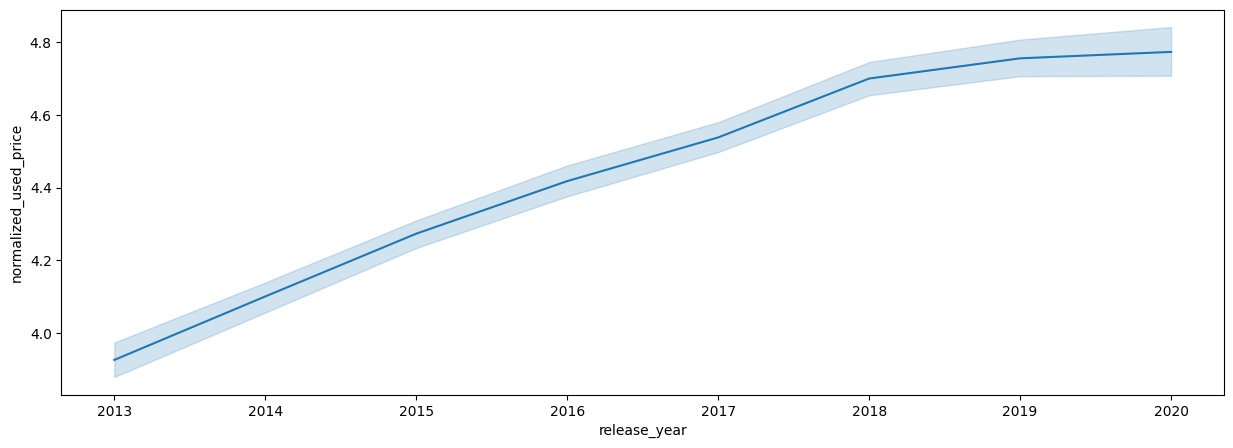

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = df,x='release_year', y= 'normalized_used_price' )
plt.show()

* The price of used devices has increased over the years.

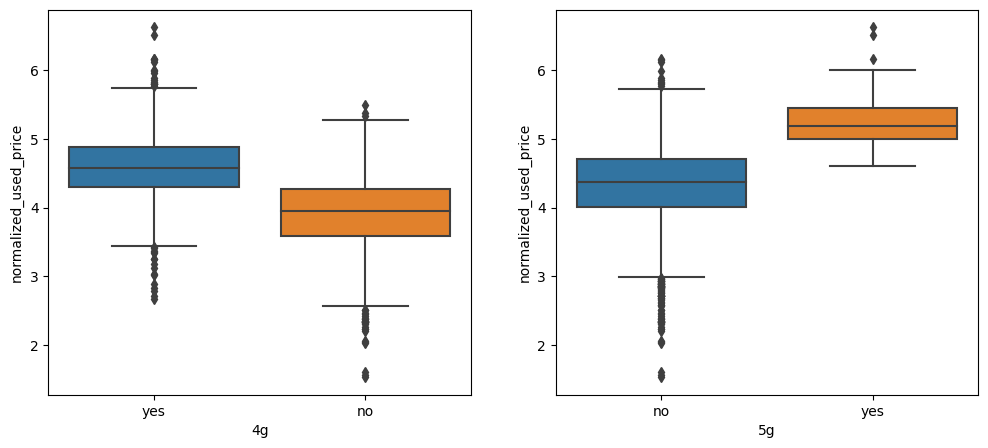

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

* As expected, used devices offering 4G and 5G networks are generally priced higher than the ones without 4G and 5G networks.

## Data Preprocessing

- Missing value treatment
- Feature engineering
- Outlier detection and treatment
- Preparing data for modeling
- Any other preprocessing steps

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* Data is full of outliers so missing values will be replaced by median as it is less sestive to outliers.

In [ ]:
miss_col= ['main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight']
for col in miss_col:
    df[col] = df[col].fillna(
        value=df.groupby(['release_year', 'brand_name'])[col].transform("median"))

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
miss_col2 = ["main_camera_mp","selfie_camera_mp","battery","weight",]
for col in miss_col2:
    df[col] = df[col].fillna(
        value=df.groupby(['brand_name'])[col].transform("median"))

In [ ]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

* The remaining missing values will be filled by `main_camera_mp` the column median.

In [ ]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## EDA

Creating a new colunm for years since the device is releases for easier understanding, using 2021 as bench mark.


In [ ]:
df["years_since_release"] = 2021 - df["release_year"]
df.drop("release_year", axis=1, inplace=True)
df["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

* 50% of the used devices in the data were originally released five and half years ago.

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


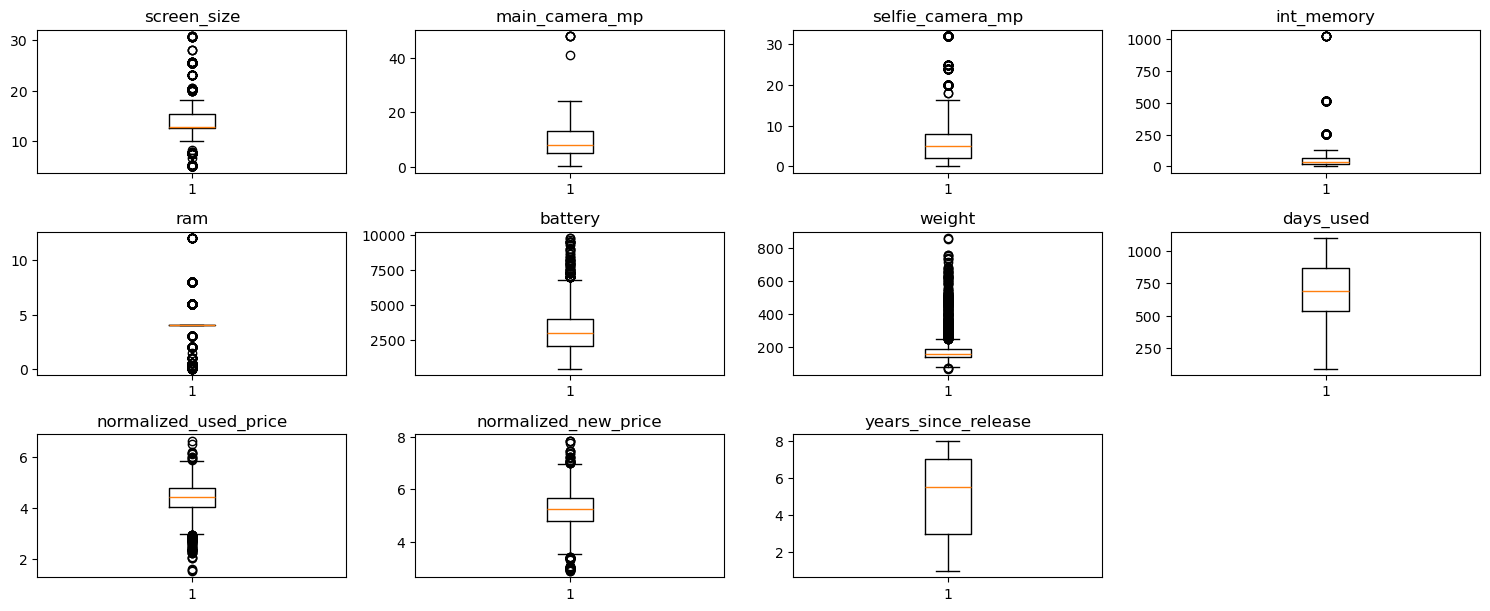

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 8))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data . However, it will not treat them as they are proper values.

### Data Preparation for modeling

In [ ]:
X = df.drop("normalized_used_price", axis=1)
y = df["normalized_used_price"]
print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
X = sm.add_constant(X)

In [ ]:
X.dtypes

const                   float64
brand_name               object
os                       object
screen_size             float64
4g                       object
5g                       object
main_camera_mp          float64
selfie_camera_mp        float64
int_memory              float64
ram                     float64
battery                 float64
weight                  float64
days_used                 int64
normalized_new_price    float64
years_since_release       int64
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['brand_name', 'os','5g','4g']
encoder = OneHotEncoder(drop='first')

encoded_columns = encoder.fit_transform(X[cat_columns])

encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(cat_columns))

X_encoded = X.drop(columns=cat_columns)

X_encoded = pd.concat([X_encoded, encoded_df], axis=1)

X_encoded.head()



,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,5g_yes,4g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.30, random_state=1)

## Model Building - Linear Regression

In [ ]:
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                           13:53:18   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* Both R-squared and Adjusted R sqaured of the model are greater than 0.8,  indicating that it can explain more than 80% of the variance in the normalized price of used phones.


## Model Performance Check

In [ ]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def model_performance_regression(model, predictors, target):


    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)


    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
model_train_perf = model_performance_regression(model, x_train, y_train)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
print("Test Performance\n")
model_test_perf = model_performance_regression(model, x_test, y_test)
model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.849, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting the train data.

- MAE suggests that the model can predict the price for used phones/tablets within a mean error of 0.18 euros on the test data

- The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
- MAPE of 4.5 on the test data means that the model is able to predict within 4.5% of the price for used phones/tablets.

## Checking Linear Regression Assumptions

Checking if assumptions of linear regression are satisfied.

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
vif= checking_vif(x_train)
vif[vif["VIF"] > 5]

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
7,weight,6.396749
12,brand_name_Apple,13.057668
21,brand_name_Huawei,5.983852
34,brand_name_Others,9.711034
37,brand_name_Samsung,7.539866
46,os_iOS,11.784684


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* Numerical columns with VIF > 5 will be removed and the effect on R squared will bbe explored.
* High VIF values for the constant and the dummy variables will be ignored.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_variables):
    adj_r2 = []
    rmse = []

    for cols in high_vif_variables:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]


        olsmodel = sm.OLS(target, train).fit()
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_variables,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size','weight']
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif[vif["VIF"] > 5]

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
11,brand_name_Apple,13.000338
20,brand_name_Huawei,5.981046
33,brand_name_Others,9.652572
36,brand_name_Samsung,7.523421
45,os_iOS,11.678957


In [ ]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = predictors[cols]
    model = sm.OLS(y_train, x_train_aux).fit()

    p_values = model.pvalues
    max_p_value = max(p_values)


    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '5g_yes', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                           16:01:01   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* Dropping the high p-value predictor variables has not adversely affected the model performance.
* This shows that these variables do not significantly impact the target variables.

Linearity check:

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmod2.fittedvalues
df_pred["Residuals"] = olsmod2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


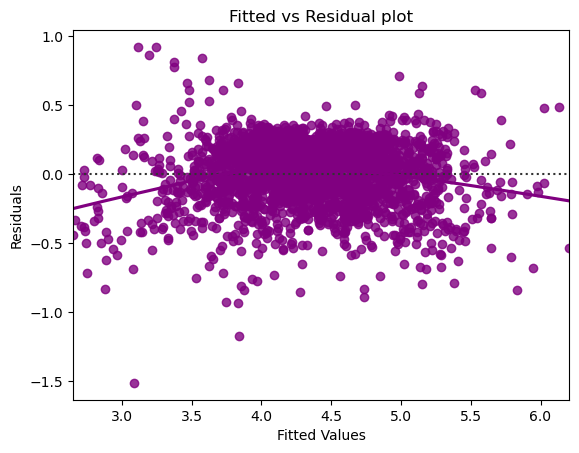

In [ ]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


* There is no pattern in the plot above. Ttherefore, the assumptions of linearity and independence are satisfied.

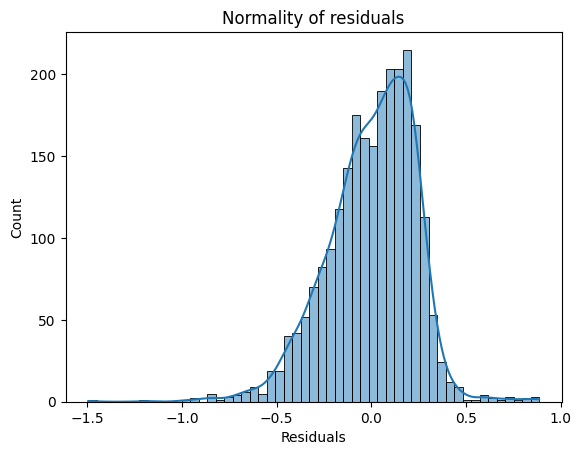

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a slight bell shape.

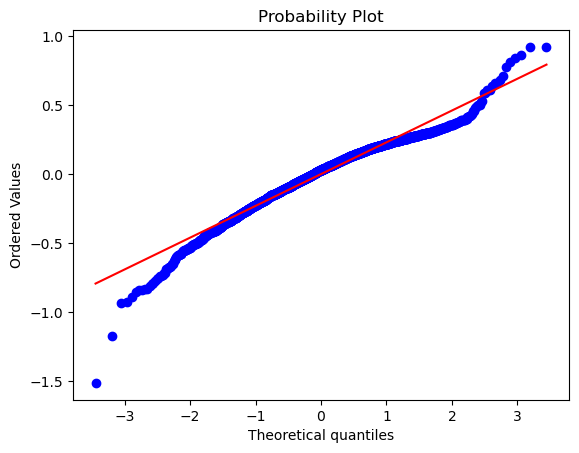

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
Strictly speaking, the residuals are not normal. However, as an approximation, it is accept that the distribution is close to being normal.
So, the assumption is satisfied.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

In [ ]:
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373741
2341,3.696103,3.962922
1913,3.592093,3.690961
688,4.306495,4.116687
650,4.522115,5.137917
2291,4.259294,4.395249
40,4.997685,5.434104
1884,3.875359,4.054845
2538,4.206631,4.047439
45,5.380450,5.276715


* It can be observed that the model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                           19:50:15   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, the model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within ~4.5% of the price of the used devices.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1. The model is able to explain ~84% of the variation in the data and within 4.5% of price of used devices on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes

2. A unit increase in the normalized new model price will result in a 0.4415 unit increase in the normalized used device price, all other variables held constant
   
3. A unit increase in the amount of RAM will result in a 0.0207 unit increase in the normalized used device price, all other variables held constant
   
4. A unit increase in the years since the original release of the device will result in a 0.0292 unit decrease in the normalized used device price, all other variables held constant

5. A unit increase in the resolution of the front camera will result in a 0.0138 unit increase in the normalized used device price, all other variables held constant

6. A unit increase in the resolution of the rear camera will result in a 0.0210 unit increase in the normalized used device price, all other variables held constant

7. The normalized used device price for devices with 4G connectivity will be 0.0502 units more than those without 4G connectivity

8. Several key factors contribute to the pricing of a pre-owned device, with enhancements in RAM capacity, selfie and main camera specifications, screen size, and the inclusion of 4G connectivity directly influencing the appreciation in value of the devices.

9. The company may consider intensifying its marketing efforts for pre-owned devices, emphasizing their longevity in the market, which contributes to a gradual reduction in price over subsequent years. This approach can strategically capitalize on the correlation between the extended release duration and the diminished cost of these products.

10. ReCell should look to attract people who want to sell used phones and tablets which were originally released in recent years and have good front and rear camera resolutions.

11. Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different price segments.

12. ReCell can also look to sell other used gadgets, like smart watches, which might attract certain segments of customers.

___